In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('income.csv')
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [79]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [80]:
df.tail()

,age,experience,income
15,41,6,38900
16,58,17,63600
17,23,1,30870
18,44,9,44190
19,37,10,48700


df.columns

In [81]:
df.shape

(20, 3)

In [82]:
df.isna().sum()

age           0
experience    0
income        0
dtype: int64

In [83]:
df.dtypes

age           int64
experience    int64
income        int64
dtype: object

In [84]:
x=df.iloc[:,:-1]
x

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10
5,51,7
6,28,5
7,33,4
8,37,5
9,39,8


In [85]:
y=df.iloc[:,-1]
y

0     30450
1     35670
2     31580
3     40130
4     47830
5     41630
6     41340
7     37650
8     40250
9     45150
10    27840
11    46110
12    36720
13    34800
14    51300
15    38900
16    63600
17    30870
18    44190
19    48700
Name: income, dtype: int64

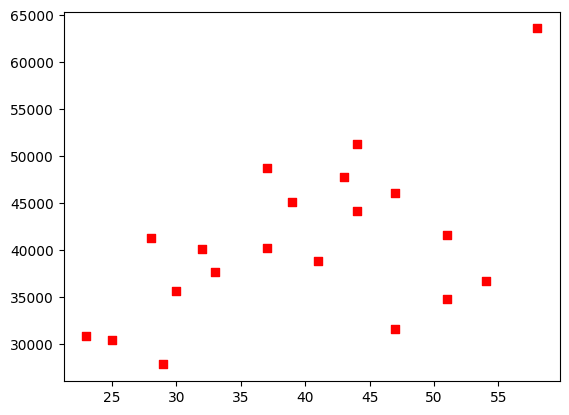

In [102]:
plt.scatter(df['age'],y,marker='s',color='r')

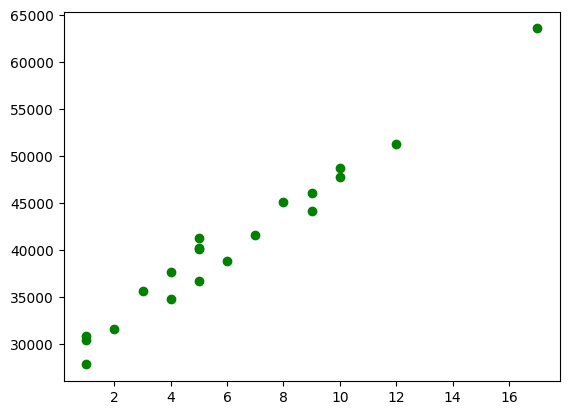

In [103]:
plt.scatter(df['experience'],y,marker='o',color='g')

<Axes: xlabel='age', ylabel='income'>

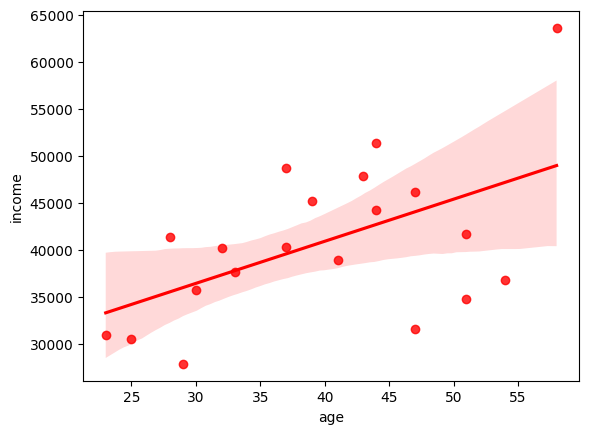

In [88]:
import seaborn as sns
sns.regplot(x=df['age'],y=y,color='r')


<Axes: xlabel='experience', ylabel='income'>

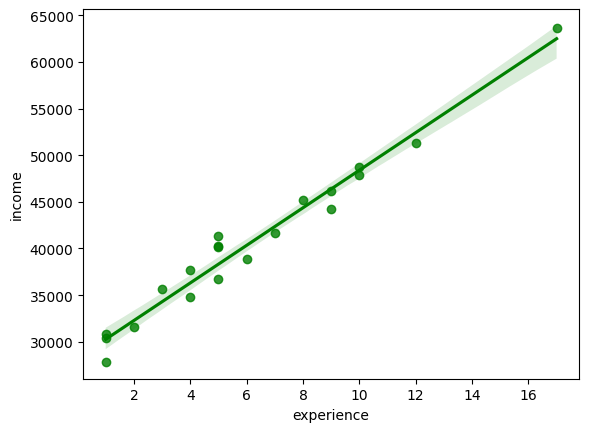

In [89]:
import seaborn as sns
sns.regplot(x=df['experience'],y=y,color='g')

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,age,experience
4,43,10
17,23,1
7,33,4
1,30,3
13,51,4
0,25,1
19,37,10
18,44,9
9,39,8
15,41,6


In [91]:
x_test

,age,experience
3,32,5
16,58,17
6,28,5
10,29,1
2,47,2
14,44,12


In [92]:
y_train

4     47830
17    30870
7     37650
1     35670
13    34800
0     30450
19    48700
18    44190
9     45150
15    38900
8     40250
12    36720
11    46110
5     41630
Name: income, dtype: int64

In [93]:
y_test

3     40130
16    63600
6     41340
10    27840
2     31580
14    51300
Name: income, dtype: int64

In [94]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([38885.62700333, 61009.07379779, 39261.045514  , 30979.30184839,
       31336.89080986, 52088.17728771])

In [95]:
y_test

3     40130
16    63600
6     41340
10    27840
2     31580
14    51300
Name: income, dtype: int64

In [96]:
print(model.predict([[47,9]]))

[45665.69662626]


c:\Users\Haritha V R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
print('slope is',list(zip(x,model.coef_)))

slope is [('age', np.float64(-93.85462766779926)), ('experience', np.float64(2046.9722594853922))]


In [98]:
print('constant is',model.intercept_)

constant is 31654.113791273317


In [99]:
df1=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
df1

,Actual value,predicted value,Difference
3,40130,38885.627003,1244.372997
16,63600,61009.073798,2590.926202
6,41340,39261.045514,2078.954486
10,27840,30979.301848,-3139.301848
2,31580,31336.890810,243.109190
14,51300,52088.177288,-788.177288


In [100]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.04297668585028256

In [101]:
score=r2_score(y_test,y_pred)
score

0.97323173993828